# Plot the wind direction during precipitation events
- from Eklima and the 
- minuetly observations

In [1]:
import numpy as np
import netCDF4

import sys
from windrose import WindroseAxes
#sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/')
sys.path.append('/home/franzihe/Documents/Python/Thesis')
import createFolder as cF
import matplotlib.pyplot as plt
import seaborn as sns


np.warnings.filterwarnings('ignore')

#%matplotlib inline

/home/franzihe/anaconda3/envs/haukeli/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/franzihe/anaconda3/envs/haukeli/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/franzihe/anaconda3/envs/haukeli/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/franzihe/anaconda3/envs/haukeli/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The deden

In [2]:
# plot cosmetics
sns.set_context('paper')

sns.set(font = 'Serif', font_scale = 1.2, )
sns.set_style('ticks', 
                  {'font.family':'serif', #'font.serif':'Helvetica'
                   'grid.linestyle': '--',
                   'axes.grid': True,
                  }, 
                   )
# Set the palette to the "pastel" default palette:
sns.set_palette("colorblind")

In [3]:
station = 'Haukeliseter'

In [4]:
meps_run = ['CTRL', 'ICE-T']
#meps_run = range(0,10)

In [5]:
savefig = 0

if savefig == 1:
    if len(meps_run) == 2:
        figdir = '/home/franzihe/Documents/Figures/Weathermast_MEPS_Retrieval/%s/CTRL_ICET/' %(station)
    if len(meps_run) == 10:
        figdir = '/home/franzihe/Documents/Figures/Weathermast_MEPS_Retrieval/%s/EM0_9/' %(station)
    cF.createFolder('%s/' %figdir)
    form = 'png'


In [6]:
m = ['12', '01', '02']


In [7]:
fn = dict()
obs_wind_dir = dict()
obs_wind_speed = dict()

meps_wind_dir = dict()
meps_wind_speed = dict()

ret_wind_dir = dict()
ret_wind_speed = dict()

In [8]:
for meps in meps_run:
    nc_dir = '/home/franzihe/Documents/Data/Weathermast_MEPS_Retrieval/%s/%s' %(station,meps)
    meps_wind_dir[meps]   = dict()
    meps_wind_speed[meps] = dict()
    
    for month in m:

        if month == '12' or  month == '01':
            t = np.arange(1,32)
        if month == '02':
            t = np.arange(1,29)
        if month == '11' or month == '12':
            year = '2016'
        if month == '01' or month == '02' or month == '03':
            year = '2017'

        for day in t:

            if day < 10:
                day = '0%s' %day
            else:
                day = '%s' %day


            Date = int(year+month+day)
            
            try:
                fn[Date] = netCDF4.Dataset(nc_dir+'/weathermast_meps_retrieval_%s_12.nc' %(Date), 'r')
            except FileNotFoundError:
              #  print('no file found {:}: {:}'.format(meps, Date))
                continue

            if len(fn[Date].variables) != 0:
              #  print(Date, meps, 'valid data')
       #     else:
                if np.nansum(fn[Date].variables['obs_precipitation_difference_2degC']) >= 0.25 \
                and np.nansum(fn[Date].variables['ret_precipitation_difference']) >= 0.25:# \
             #   and np.nansum(fn[Date].variables['meps_precipitation_difference_2degC']) >= 0.25 \

                    obs_wind_dir[Date] = fn[Date].variables['obs_wind_direction'][:]
                    obs_wind_speed[Date] = fn[Date].variables['obs_wind_speed'][:]

                    ret_wind_dir[Date] = fn[Date].variables['obs_wind_direction'][:]
                    ret_wind_speed[Date] = fn[Date].variables['obs_wind_speed'][:]

                    meps_wind_dir[meps][Date] = fn[Date].variables['meps_wind_direction'][:]
                    meps_wind_speed[meps][Date] = fn[Date].variables['meps_wind_speed'][:]

            

       #     fn[Date].close()

In [9]:
obs_ws = (list(obs_wind_speed.values()))
obs_wd = (list(obs_wind_dir.values()))

In [10]:
ret_ws = (list(ret_wind_speed.values()))
ret_wd = (list(ret_wind_dir.values()))

In [11]:
meps_ws = dict()
meps_wd = dict()

meps_WS = dict()
meps_WD = dict()

In [12]:
for meps in meps_run:
    meps_ws[meps] = (list(meps_wind_speed[meps].values()))
    meps_wd[meps] = (list(meps_wind_dir[meps].values()))

    meps_WS[meps] = np.array(meps_ws[meps])[:,:]
    meps_WD[meps] = np.array(meps_wd[meps])[:,:]

In [13]:
obs_WD = np.empty(shape=(np.array(obs_wd).shape[0],1440))
obs_WD[:] =  np.nan

obs_WS = np.empty(shape=(np.array(obs_wd).shape[0],1440))
obs_WS[:] =  np.nan
for i in range(np.array(obs_wd).shape[0]):
 #   print(np.array(obs_wd[i]).shape)
    if np.array(obs_wd[i]).shape[0] == 24:
    #    print(np.array(obs_wd[i]).shape, i)
        for k in range(np.array(obs_wd[i]).shape[0]):
            obs_WD[i,k*60] = obs_wd[i][k]
            obs_WS[i,k*60] = obs_ws[i][k]
    else:
        obs_WD[i,:] = obs_wd[i][:]
        obs_WS[i,:] = obs_ws[i][:]

In [14]:
ret_WD = np.empty(shape=(np.array(ret_wd).shape[0],1440))
ret_WD[:] =  np.nan

ret_WS = np.empty(shape=(np.array(obs_wd).shape[0],1440))
ret_WS[:] =  np.nan
for i in range(np.array(ret_wd).shape[0]):
 #   print(np.array(obs_wd[i]).shape)
    if np.array(ret_wd[i]).shape[0] == 24:
    #    print(np.array(obs_wd[i]).shape, i)
        for k in range(np.array(ret_wd[i]).shape[0]):
            ret_WD[i,k*60] = ret_wd[i][k]
            ret_WS[i,k*60] = ret_ws[i][k]
    else:
        ret_WD[i,:] = ret_wd[i][:]
        ret_WS[i,:] = ret_ws[i][:]

In [15]:
def plt_windrose( WD, WS, source):
  #  my_cmap = ListedColormap(sns.color_palette("colorblind"),5)
    ax = WindroseAxes.from_ax()
    ax.bar( WD, WS,
           normed = True, opening = 0.8, edgecolor = 'white', cmap = plt.get_cmap('Spectral_r',6),
#cmap = plt.get_cmap('Spectral_r'),# cmap,#cmap = plt.get_cmap('hot'),
           bins = np.arange(0,24,4),
         #  bins = np.arange(0,27,3)
          )# alpha = 0.6)
    ax._info['bins']
    ax.set_legend()
    ax.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]',)
    ax.set_yticks(np.arange(3, 27, step=3))
    ax.set_yticklabels(np.arange(3, 27, step=3))
   # ax.set_title('24h precip $\geq$ 0.25mm', y=1.08,)

    
 #   ax.text(0.1, 1.1, '%s' %(source),
  #       verticalalignment='center', horizontalalignment='center',
   #      transform=ax.transAxes,
    #     color = 'black', fontweight = 'bold', bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5.5})

## Double fence

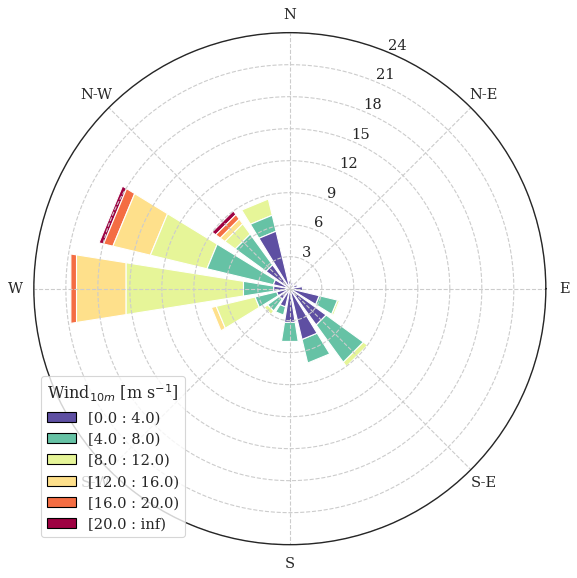

In [16]:
plt_windrose( obs_WD[~np.isnan(obs_WD[:,:])], obs_WS[~np.isnan(obs_WD[:,:])], 'Observations')

if savefig == 1:
    fig_name = 'winter_2016_2017_windrose_obs.%s' %(form)
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: %s/%s' %(figdir,fig_name))
    plt.close()

## Retrieval

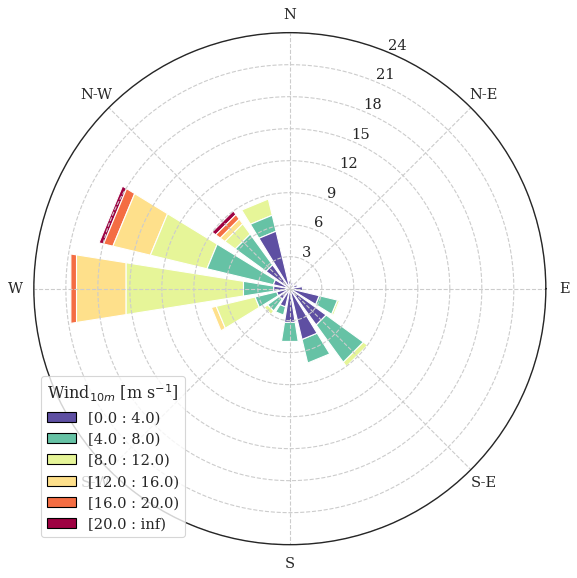

In [17]:
plt_windrose( ret_WD[~np.isnan(ret_WD[:,:])], ret_WS[~np.isnan(ret_WD[:,:])], 'Retrieval')

if savefig == 1:
    fig_name = 'winter_2016_2017_windrose_ret.%s' %(form)
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: %s/%s' %(figdir,fig_name))
    plt.close()

## MEPS

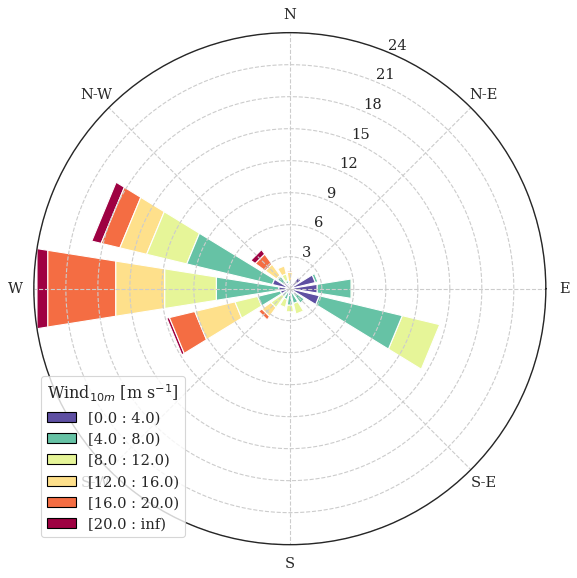

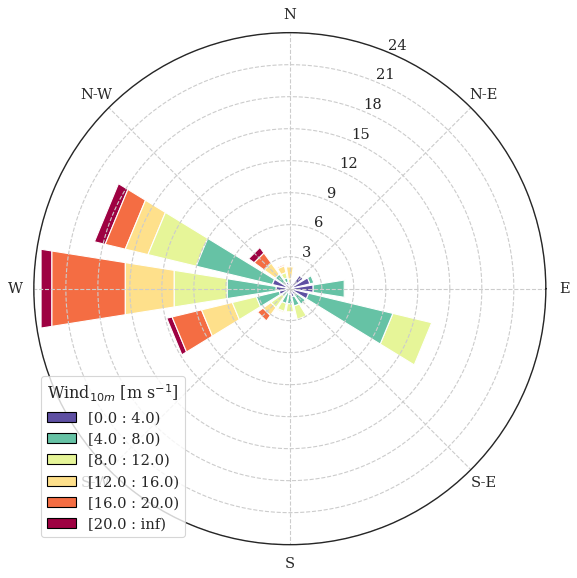

In [18]:
for meps in meps_run:
    plt_windrose( meps_WD[meps][~np.isnan(meps_WD[meps][:,:])], meps_WS[meps][~np.isnan(meps_WD[meps][:,:])], 'MEPS - %s' %meps)


    if savefig == 1:
        fig_name = 'winter_2016_2017_windrose_%s.%s' %(meps,form)
        plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight', transparent=True)
        print('plot saved: %s/%s' %(figdir,fig_name))
        plt.close()

In [19]:
if len(meps_run) == 10:
    meps_WS_EM = np.mean(np.stack((meps_WS[0], meps_WS[1],
                               meps_WS[2], meps_WS[3],
                               meps_WS[4], meps_WS[5],
                               meps_WS[6], meps_WS[7],
                               meps_WS[8], meps_WS[9]), axis=2), axis=2)

    meps_WD_EM = np.mean(np.stack((meps_WD[0], meps_WD[1],
                               meps_WD[2], meps_WD[3],
                               meps_WD[4], meps_WD[5],
                               meps_WD[6], meps_WD[7],
                               meps_WD[8], meps_WD[9]), axis=2), axis=2)
    
    plt_windrose( meps_WD_EM[~np.isnan(meps_WD_EM[:,:])], 
             meps_WS_EM[~np.isnan(meps_WD_EM[:,:])], 
             'MEPS - Ensemble mean')


    if savefig == 1:
        fig_name = 'winter_2016_2017_windrose_EM.%s' %(form)
        plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight', transparent=True)
        print('plot saved: %s/%s' %(figdir,fig_name))
        plt.close()